# Data Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/cat_train.zip"

In [ ]:
!unzip "/content/drive/My Drive/cat_validation.zip"

Streaming output truncated to the last 5000 lines.
  inflating: validation/cat/cat.10001.jpg  
  inflating: validation/cat/cat.10002.jpg  
  inflating: validation/cat/cat.10003.jpg  
  inflating: validation/cat/cat.10004.jpg  
  inflating: validation/cat/cat.10005.jpg  
  inflating: validation/cat/cat.10006.jpg  
  inflating: validation/cat/cat.10007.jpg  
  inflating: validation/cat/cat.10008.jpg  
  inflating: validation/cat/cat.10009.jpg  
  inflating: validation/cat/cat.10010.jpg  
  inflating: validation/cat/cat.10011.jpg  
  inflating: validation/cat/cat.10012.jpg  
  inflating: validation/cat/cat.10013.jpg  
  inflating: validation/cat/cat.10014.jpg  
  inflating: validation/cat/cat.10015.jpg  
  inflating: validation/cat/cat.10016.jpg  
  inflating: validation/cat/cat.10017.jpg  
  inflating: validation/cat/cat.10018.jpg  
  inflating: validation/cat/cat.10019.jpg  
  inflating: validation/cat/cat.10020.jpg  
  inflating: validation/cat/cat.10021.jpg  
  inflating: validation/c

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os



Populating the interactive namespace from numpy and matplotlib


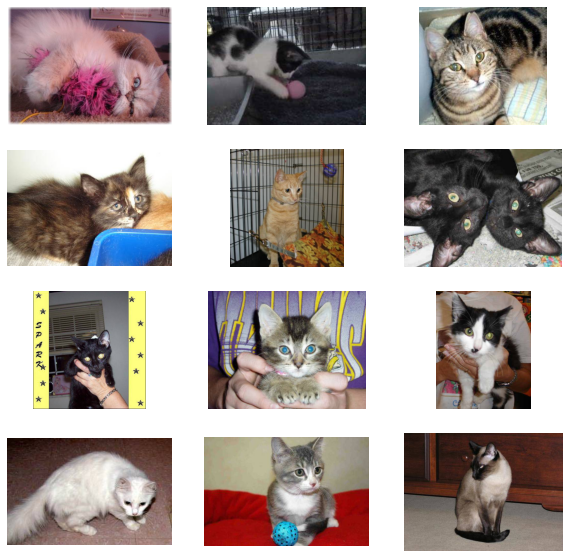

In [ ]:
cat_train='/content/train/cat'
images = os.listdir(cat_train)

fig = plt.figure(figsize=(10,10))

for n,i in enumerate(images[:12]): #n=1
  path = cat_train+'/'+i
  img = mpimg.imread(path)
  fig.add_subplot(4,3,n+1)
  plt.axis('off')
  plt.imshow(img)


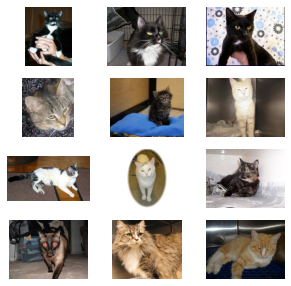

In [ ]:
cat_val='/content/validation/cat'
images = os.listdir(cat_val)

fig = plt.figure(figsize=(5, 5))

for n,i in enumerate(images[:12]):
  path = cat_val+'/'+i
  img = mpimg.imread(path)
  fig.add_subplot(4,3,n+1)
  plt.axis('off')
  plt.imshow(img)


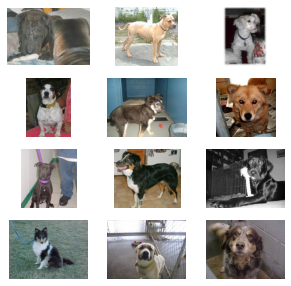

In [ ]:
dog_train='/content/train/dog'
images = os.listdir(dog_train)

fig = plt.figure(figsize=(5, 5))

for n,i in enumerate(images[:12]):
  path = dog_train+'/'+i
  img = mpimg.imread(path)
  fig.add_subplot(4,3,n+1)
  plt.axis('off')
  plt.imshow(img)


In [ ]:
import tensorflow as tf #framework
#build upon keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,  BatchNormalization
from tensorflow.keras.layers import  Dropout, Flatten, Dense


In [ ]:
# dimensions of our images.
img_width, img_height = 150, 150

#setting up the directories
train_data_dir = '/content/train' #/content/train
validation_data_dir = '/content/validation'

#setting up the batchsizes.

epochs = 50
batch_size = 16 #in power of 2

In [ ]:
train_data_dir

'/content/train'

In [ ]:
input_shape = (img_width, img_height, 3)

In [ ]:
input_shape

(150, 150, 3)

In [ ]:
# make an object of sequential class
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


#configuring the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', #adam
              metrics=['accuracy'])

#to print a summary representation of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       2

In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1/ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#this generates batches of augment data for training
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary') #categorical

Found 20000 images belonging to 2 classes.


In [ ]:
# this is the augmentation configuration we will use for validating
val_datagen = ImageDataGenerator(rescale=1./255)

#this generates batches of augment data for validating
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



Found 5000 images belonging to 2 classes.


In [ ]:
#to train the model on data generated batch-by-batch
# 152 sec for one epoch acc 0.5950,0.52-> 2000,800 samples in cpu
# 1458 sec acc 0.6824,0.69-> cpu
# 162 sec 0.6987,0.7034-> gpu
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

Epoch 1/50
1250/1250 [==============================] - 199s 150ms/step - loss: 0.6784 - accuracy: 0.6613 - val_loss: 0.4729 - val_accuracy: 0.7642
Epoch 2/50
 226/1250 [====>.........................] - ETA: 2:15 - loss: 0.5053 - accuracy: 0.7514

KeyboardInterrupt: ignored

In [ ]:
#to save the weights in the model as a HDFS file

model.save_weights('first_try.h5')


In [ ]:
#to save the architecture of the model as a json file

with open('model_architecture.json','w') as f:
    f.write(model.to_json())

In [ ]:
#from keras.models import model_from_json

#json_file = open('model_architecture.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#model = model_from_json(loaded_model_json)
#model.load_weights("first_try.h5")
#print("Loaded model from disk")'''


In [ ]:
from keras.models import load_model

In [ ]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('first_try.h5')


ValueError: ignored

batch,rows,cols,channels

In [ ]:
from keras.preprocessing import image
test_image=image.load_img('/content/validation/cat/cat.10001.jpg',target_size=(img_width,img_height))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image/255)
print(result[0][0])

0.29130247


In [ ]:
if result[0][0]>0.5:
    prediction='dog'
else:
    prediction='cat'
print(prediction)

cat


In [ ]:
(1,150,150,3)